<a href="https://colab.research.google.com/github/lukeawayne/FormerProjects/blob/main/QTProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ___Quantum Tunneling___

#### Importing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as sc
%matplotlib notebook

##  introduction

Quantum Tunneling is a very unique and strange phenomenon. In addition, it is not intuitive and seems to go against previously accepted theories. As in a classical view of physics, a single electron is repelled by an electric field as long as the energy of the electron is below the energy potential of the barrier. The only way an electron can overcome this potential well is if E > V, otherwise the particle will forever be confined within this well. However, particles react differently within the quantum world. This can be due to the principle of superposition. In quantum mechanics, the situation is not so simple. The particle can still escape even if it has an energy that is below the energy of the potential barrier, although the probability of escape is still small unless E is close to V. In that case, the particle may tunnel through the potential barrier and emerge with the same energy as initial. With that being said, Quantum tunneling is the phenomenon in which a wavefunction can propagate through a potential barrier with lower energy than expected. This process occurs in nature because there exists a nontrivial solution to the Schrodinger equation in a classically forbidden region, which corresponds to the exponential decay of the magnitude of the wavefunction.

Quantum tunneling is the quantum mechanical phenomenon where a wavefunction can propagate through a potential barrier. Quantum tunneling is a major contributer and is vital for several different phenomena:

- nuclear fusion
- radioactive decay

Within this project, I plan to explore a few different concepts to see how they will impact the theory of quantum tunneling, including:

- What is the minimum threshold at which particles tunnel through a barrier? **&**
- How will boundary conditions impact the system?

In addition, I plan to compare the rates of tunneling that occurs within the stars. To do this, I will have to find data to use that has documented theoretical and and analytical results. This will help to show just how useful quantum tunneling can be. If we could figure out exactly how to master the process that is occuring witin the stars, then it would open the door to being able to reproduce these results on Earth. Understanding this process could lead us to the development of techniques to achieve nuclear fusion on Earth. It could also lead to other developments.



## Methodology

Now that In order to model this, I plan to use a numerical analysis method to track the motion of the wavepacket with respect to time. More specifically, I plan to use the Finite-Difference Time-Domain (FDTD) method, or Yee’s method, to model the quantum effects of the system. This method is particularly great at completing this analysis as it easily finds approximate solutions to systems of differential equations, and it also allows for the system to modeled with respect to time. Combing the FDTD method with the use of Python, Matplotlib, and Scipy, should allow to completely model the system while showing good visualization tactics to ensure the program is working as intended. In particular, this program will:

Use python, matplotlib, and major other visualization packages to:

- Animate a wave packet moving along an axis and have it interact with a potential barrier

- Change initial conditions of the barrier (height, etc.) to see the impact

_Will be using the Schrodinger Equation to model the system_. This will allow me to model the particles within the quantum world, and not just from a classical standpoint. I was able to find a chunk of code that accomplsihes nearly what I want to look at and examine. Starting with their code, I plan to add to it adn run loops to measure and find how adjusting different elements will impact the system, such as:
- Potenial barrier height
- Incoming electron energy



### Class for QMT FDTD. All the main variables and the fdtd update function are defined here.

#### I was able to find a source of python code that allowed me to adjust and manipulate it to look at exaclty what I wanted

In [ ]:
class QMfdtd:
    def __init__(self, V0, bw, ke, sig):
        self.V0 = V0 * sc.value('electron volt')  # height of potential barrier in Joules
        self.ke = ke * sc.value('electron volt')  # kinetic energy of electron in Joules
        self.k0 = np.sqrt(self.ke * 2 * sc.m_e / (sc.hbar**2))  # wave vector of electron in m^-1
        self.bw = bw * sc.value('Angstrom star')  # potential barrier width in m
        self.sig = sig * sc.value('Angstrom star')  # Initial spread of Gaussian wavefunction
        self.dx = np.minimum((self.bw / 25.0), (self.sig / 25.0))  # grid cell size
        self.dt = 0.9 * sc.hbar / ((sc.hbar**2/(sc.m_e * self.dx**2)) + (self.V0 / 2.0))  # time step size
        length = 40 * np.maximum(self.bw, self.sig)  # length of the simulation domain
        self.ll = int(length / self.dx)  # total number of grid points in the domain
        vel = sc.hbar * self.k0 / sc.m_e
        self.tt = int(0.35 * length / vel / self.dt)  # total number of time steps in the simulation
        self.lx = np.linspace(0.0, length, self.ll)  # 1D position vector along x

        # potential barrier
        self.Vx = np.zeros(self.ll) #creating potential size of grid
        bwgrid = int(self.bw/(2.0 * self.dx)) #
        bposgrid = int(self.ll/2.0)
        bl = bposgrid - bwgrid
        br = bposgrid + bwgrid
        self.Vx[bl:br] = self.V0 #creating the square potential barrier

        # wavefunction arrays
        self.psir = np.zeros((self.ll)) #intializing real portion of the wave packet
        self.psii = np.zeros((self.ll)) #intializing imaginary portion of the wave packet
        self.psimag = np.zeros(self.ll) #intializing total portion of the wave packet
        ac = 1.0 / np.sqrt((np.sqrt(np.pi)) * self.sig)
        x0 = bl * self.dx - 6 * self.sig #making its position
        psigauss = ac * np.exp(-(self.lx - x0)**2 / (2.0 * self.sig**2)) #guass constant
        self.psir = psigauss * np.cos(self.k0 * self.lx) #redefining the real part
        self.psii = psigauss * np.sin(self.k0 * self.lx) #redefining the imaginary part
        self.psimag = self.psir**2 + self.psii**2 #adding the total (real + imaginary)

        # fdtd update coefficients
        self.c1 = sc.hbar * self.dt / (2.0 * sc.m_e * self.dx**2)
        self.c2 = self.dt / sc.hbar

#### The main FDTD update function.

    def fdtd_update(self):
        self.psii[1:self.ll - 1] = (self.c1 * (self.psir[2:self.ll] - 2.0 * self.psir[1:self.ll - 1]
                                    + self.psir[0:self.ll - 2])
                                    - self.c2 * self.Vx[1:self.ll - 1] * self.psir[1:self.ll - 1]
                                    + self.psii[1:self.ll - 1])  #updating the position for imginary
        self.psir[1:self.ll - 1] = (-self.c1 * (self.psii[2:self.ll] - 2.0 * self.psii[1:self.ll - 1]
                                    + self.psii[0:self.ll - 2]) #updating the position for real
                                    + self.c2 * self.Vx[1:self.ll - 1] * self.psii[1:self.ll - 1]
                                    + self.psir[1:self.ll - 1])
        self.psimag = self.psir**2 + self.psii**2 #updating the position for total

### Function that defines the run routine and plots

#### function for completing the animation

In [ ]:
def run_sim(V0_in, bw_in, ke_in, sig_in):

    #intializing the class
    q1 = QMfdtd(V0_in, bw_in, ke_in, sig_in)

    #showing values used
    print('Potential barrier =', round(q1.V0 / sc.value('electron volt'), 2), 'eV')
    print('Potential barrier width =', round(q1.bw / sc.value('Angstrom star'), 2), 'A')
    print('Electron energy =', round(q1.ke / sc.value('electron volt'), 2), 'eV')
    plt.ion()
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_xlabel('position ($\AA$)')
    ax1.set_ylabel('norm magnitude')
    fig1.show()

     #loop for simulating the collision
    for nn in range(0, q1.tt):
        q1.fdtd_update()
        if nn % 1000 == 0:
            tstr = 'Time = ' + str(round(nn * q1.dt * 1e15, 4)) + ' fs'
            ax1.clear()
            ax1.plot(q1.lx / sc.value('Angstrom star'), q1.psimag / np.amax(q1.psimag), label='$|\Psi|^2$')
            ax1.plot(q1.lx / sc.value('Angstrom star'), q1.Vx / np.amax(q1.Vx), label='barrier')
            ax1.legend()
            ax1.set_title(tstr)
            ax1.set_xlabel('position ($\AA$)')
            ax1.set_ylabel('normalized magnitude')
            fig1.canvas.draw()

    #plotting the final state
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.set_xlabel('position ($\AA$)')
    ax2.set_ylabel('$\Psi$')
    ax2.set_title('Final wavefunctions (normalized)')
    ax2.plot(q1.lx / sc.value('Angstrom star'), q1.psimag / np.amax(q1.psimag), label='$|\Psi|^2$')
    ax2.plot(q1.lx / sc.value('Angstrom star'), q1.Vx / np.amax(q1.Vx), label='barrier')
    ax2.legend()

#### Function for just plotting results

In [ ]:
def run_sim2(V0_in, bw_in, ke_in, sig_in):

    #creating a class instance
    q1 = QMfdtd(V0_in, bw_in, ke_in, sig_in)

    #showing values used
    print('Potential barrier =', round(q1.V0 / sc.value('electron volt'), 2), 'eV')
    print('Potential barrier width =', round(q1.bw / sc.value('Angstrom star'), 2), 'A')
    print('Electron energy =', round(q1.ke / sc.value('electron volt'), 2), 'eV')
    plt.ion()

    #loop for simulating the collision
    for i in range(0, q1.tt):
        q1.fdtd_update()
        if i % 5000 == 0:
            tstr = 'Time = ' + str(round(i * q1.dt * 1e15, 4)) + ' fs'

    #plotting final wave distribution
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.set_xlabel('position ($\AA$)')
    ax2.set_ylabel('$\Psi$')
    ax2.set_title('Final wavefunctions (normalized)')
    ax2.plot(q1.lx / sc.value('Angstrom star'), q1.psimag / np.amax(q1.psimag), label='$|\Psi|^2$')
    ax2.plot(q1.lx / sc.value('Angstrom star'), q1.Vx / np.amax(q1.Vx), label='barrier')
    ax2.legend()
    fig2.show()
    fig2.tight_layout()
    fig2.canvas.draw()

## Results and Discussion

### Plotting

#### Showing reuslts of the simulation

Potential barrier = 600.0 eV
Potential barrier width = 0.25 A
Electron energy = 300.0 eV


<IPython.core.display.Javascript object>


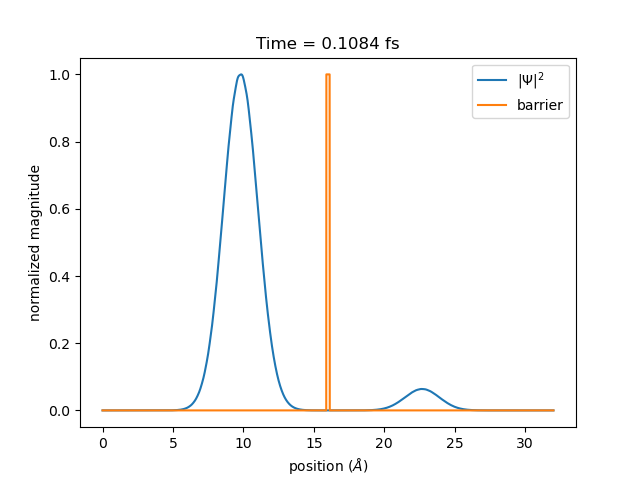

<IPython.core.display.Javascript object>


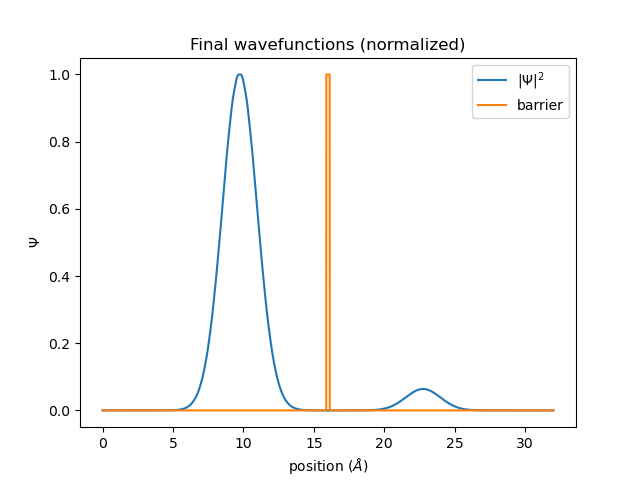

In [ ]:
V0_in = 600 #eV
bw_in = 0.25 #A
ke_in = 300 #eV
sig_in = 0.8 #A
run_sim(V0_in, bw_in, ke_in, sig_in)

### Changing incoming electron energy:

Potential barrier = 600.0 eV
Potential barrier width = 0.25 A
Electron energy = 200.0 eV


<IPython.core.display.Javascript object>


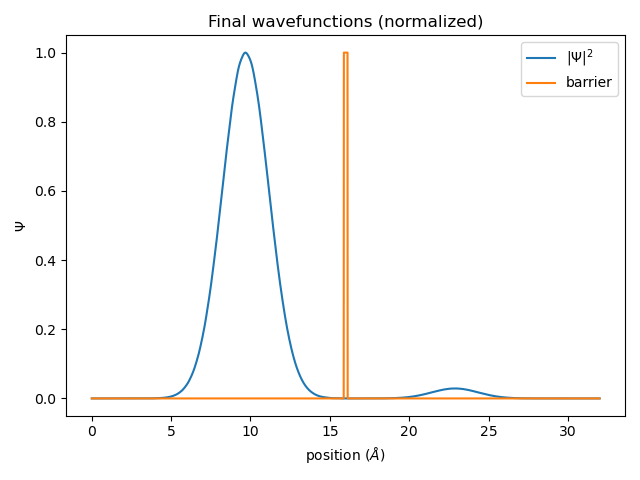

Potential barrier = 600.0 eV
Potential barrier width = 0.25 A
Electron energy = 400.0 eV


<IPython.core.display.Javascript object>


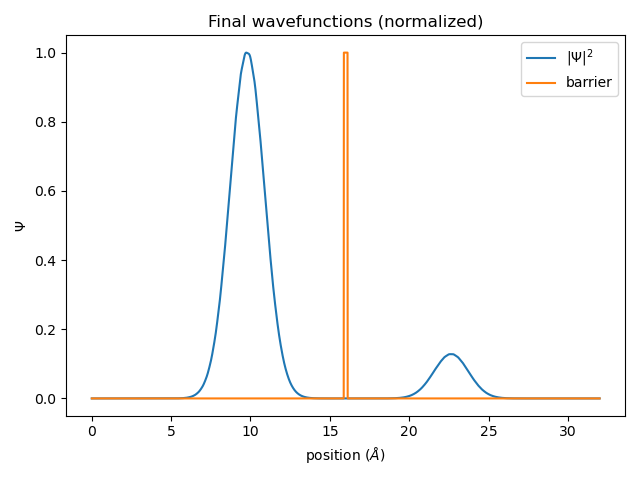

Potential barrier = 600.0 eV
Potential barrier width = 0.25 A
Electron energy = 600.0 eV


<IPython.core.display.Javascript object>


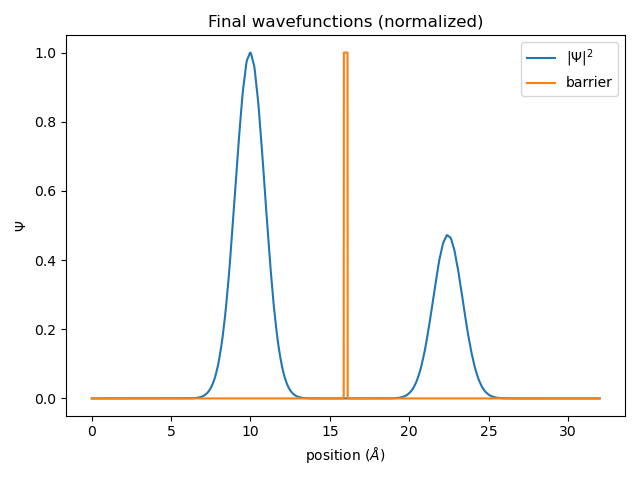

Potential barrier = 600.0 eV
Potential barrier width = 0.25 A
Electron energy = 800.0 eV


<IPython.core.display.Javascript object>


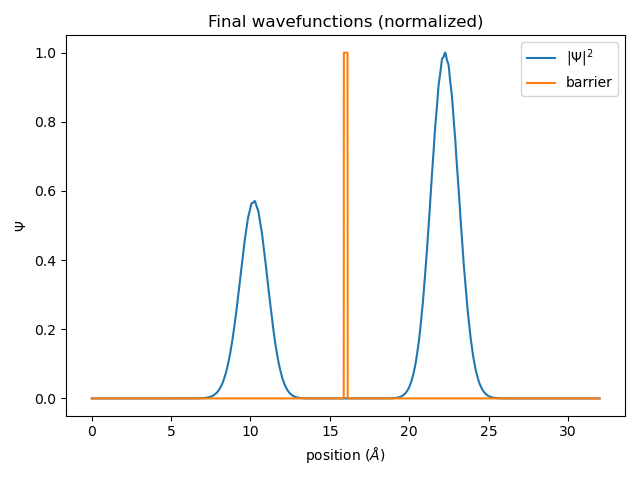

In [ ]:
#changing electron energy:
electron_ke = [200,400,600,800]

for i in electron_ke:
    run_sim2(V0_in, bw_in, i, sig_in)

### Changing potential barrier height:

Potential barrier = 200.0 eV
Potential barrier width = 0.25 A
Electron energy = 250.0 eV


<IPython.core.display.Javascript object>


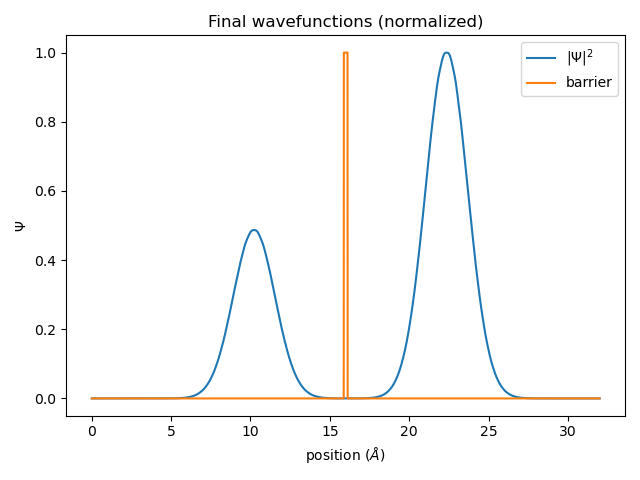

Potential barrier = 400.0 eV
Potential barrier width = 0.25 A
Electron energy = 250.0 eV


<IPython.core.display.Javascript object>


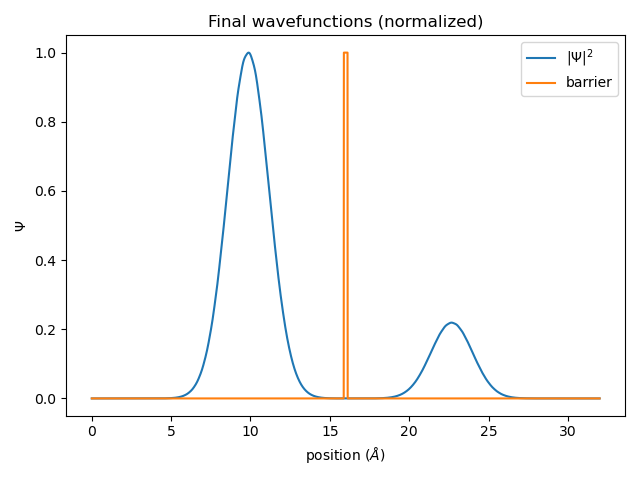

Potential barrier = 600.0 eV
Potential barrier width = 0.25 A
Electron energy = 250.0 eV


<IPython.core.display.Javascript object>


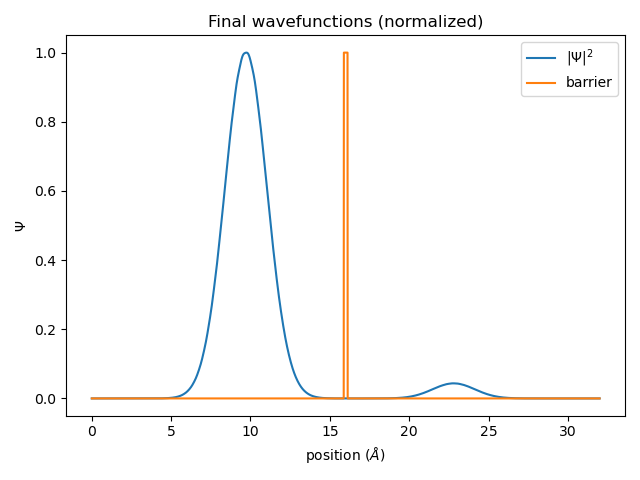

Potential barrier = 800.0 eV
Potential barrier width = 0.25 A
Electron energy = 250.0 eV


<IPython.core.display.Javascript object>


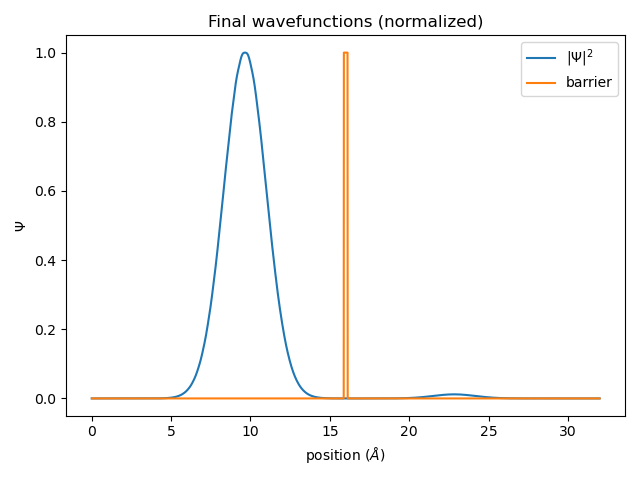

In [ ]:
#changing electron energy:
barrier_height = [200,400,600,800]

for i in barrier_height:
    run_sim2(i, bw_in, ke_in, sig_in)

##  Conclusion and Perspectives

Overall, this project was successful in exploring the phenomenon of quantum tunneling. I was able to confirm relationships and was also able to answer the initial questions I began with. Such as, I was able to confirm the relationship between electron and barrier energy is exponential. Which is mathematically expected.


#### Boundary Conditions

Adjusting the different boundary and initial conditions to find their impact was the main goal for this project. Of the two conditions that were varied, energy of the incoming electron and the potential barrier, they both seemed to impact the system in a similar way. As both simulations were run and results were generated, they both proved to either increase or decrease the amount of particles that tunneled through the barrier at an exponential rate.

During this project, I only adjusted the two variables mentioned throughout this paper. There were a few other variables that I kept constant and did not explore their relationship to how they impact the system. Such as the width of the barrier, it was held constant at 0.25 Angstrom. I believe that if this value was also examined and had fluctuations during the project, it would align with the others and decrease or increase the values at an exponential rate as well.

#### Minimum Threshold


In order to find the minimum threshold, I looked at how much energy is required of the incoming electron in relation to the potential barrier. In addition, I examined at which values there was virtually no output into the opposite side of the potential well. Doing this shows which values are required to achieve at least some quantum tunneling. Using barriers of energy ranging from 600eV-1000eV, I found this threshold to range from 15-30%. The lower values in this range 600eV-800eV landed closer to the 15-20% range. As the potential was increased up to 1000eV, this threshold increased up to nearly 30%.

As the energy of the potential continues to increase, I would suspect that this minimum threshold will also continue to increase. Once the energy of the potential reaches a certain height, the incoming particle would need to be close in energy to be able to tunnel through. However, due to the quantum tunneling phenomenon, it would still be able to tunnel through with energy less than that of the barrier.

Potential barrier = 800.0 eV
Potential barrier width = 0.25 A
Electron energy = 700.0 eV


<IPython.core.display.Javascript object>


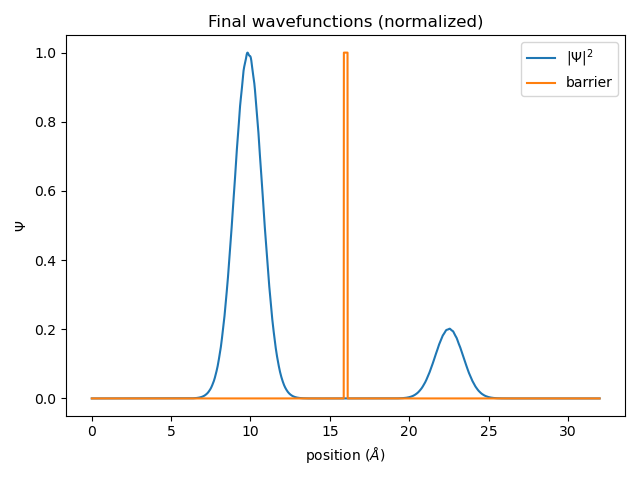

In [ ]:
V0_in = 800 #eV
bw_in = 0.25 #A
ke_in = 700 #eV
sig_in = 0.8 #A
run_sim(V0_in, bw_in, ke_in, sig_in)

## References

- Nishantsule. (n.d.). Nishantsule/quantum-tunneling: A wave function tunneling across a barrier. GitHub. Retrieved April 27, 2022, from https://github.com/nishantsule/Quantum-Tunneling
- Quantum Tunneling. Brilliant Math &amp; Science Wiki. (n.d.). Retrieved April 27, 2022, from https://brilliant.org/wiki/quantum-tunneling/#gamow-model-of-radioactive-decay
- Wikipedia contributors. "Finite-difference time-domain method." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 5 Feb. 2022. Web. 27 Apr. 2022.
- UOregon. (n.d.). Quantum Tunneling. Retrieved April 27, 2022, from http://abyss.uoregon.edu/~js/glossary/quantum_tunneling.html

##  Appendices
